In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
glft_daily = pd.read_csv("../../results/daily/glft/merged_metrics.csv", header=0)

rf_dynamic_tight = pd.read_csv("../../results/daily/rf-dynamic-train-and-norm-tight/merged_metrics.csv", header=0)
rf_dynamic_wide = pd.read_csv("../../results/daily/rf-dynamic-train-and-norm-wide/merged_metrics.csv", header=0)

rf_tight_constant_norm = pd.read_csv("../../results/daily/rf-constant-normalization-tight/merged_metrics.csv", header=0)
rf_wide_constant_norm = pd.read_csv("../../results/daily/rf-constant-normalization-wide/merged_metrics.csv", header=0)

rf_tight_constant_train = pd.read_csv("../../results/daily/rf-tight-spread-constant-train-dynamic-norm/merged_metrics.csv", header=0)
rf_wide_constant_train = pd.read_csv("../../results/daily/rf-wide-spread-constant-train-dynamic-norm/merged_metrics.csv", header=0)

glft_daily['date'] = pd.to_datetime(glft_daily['day'], unit='D', origin='2024-12-31')

rf_dynamic_tight['date'] = pd.to_datetime(rf_dynamic_tight['day'], unit='D', origin='2024-12-31')
rf_dynamic_wide['date'] = pd.to_datetime(rf_dynamic_wide['day'], unit='D', origin='2024-12-31')

rf_tight_constant_norm['date'] = pd.to_datetime(rf_tight_constant_norm['day'], unit='D', origin='2024-12-31')
rf_wide_constant_norm['date'] = pd.to_datetime(rf_wide_constant_norm['day'], unit='D', origin='2024-12-31')

rf_tight_constant_train['date'] = pd.to_datetime(rf_tight_constant_train['day'], unit='D', origin='2024-12-31')
rf_wide_constant_train['date'] = pd.to_datetime(rf_wide_constant_train['day'], unit='D', origin='2024-12-31')



In [ ]:
def ordinal(n):
    return f"{n}{'th' if 10<=n%100<=20 else {1:'st',2:'nd',3:'rd'}.get(n%10,'th')}"

frames = [
    glft_daily.assign(strategy='GLFT'),
    rf_dynamic_tight.assign(strategy='RFC-Tight - Daily Retraining'),
    rf_dynamic_wide.assign(strategy='RFC-Wide - Daily Retraining'),
    rf_tight_constant_norm.assign(strategy='RFC-Tight - Constant Normalisation Params'),
    rf_wide_constant_norm.assign(strategy='RFC-Wide - Constant Normalisation Params'),
    rf_tight_constant_train.assign(strategy='RFC-Tight - Constant Training Set'),
    rf_wide_constant_train.assign(strategy='RFC-Wide - Constant Training Set')
]

stacked = (
    pd.concat(frames)
      .pivot(index='date', columns='strategy', values='DailyNumberOfTrades')
      .sort_index()
)

x = np.arange(len(stacked.index))
n = stacked.shape[1]
bar_w = 0.8 / n

offsets = (np.arange(n) - (n-1)/2) * bar_w

fig, ax = plt.subplots(figsize=(14, 6))

for dx, strat in zip(offsets, stacked.columns):
    ax.bar(x + dx, stacked[strat], width=bar_w,
           label=strat)

def ordinal(n):
    return f"{n}{'th' if 10<=n%100<=20 else {1:'st',2:'nd',3:'rd'}.get(n%10,'th')}"

labels = [f"{d.strftime('%B')} {ordinal(d.day)}" for d in stacked.index]
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_xlabel('Date (2025)')
ax.set_ylabel('Daily Trading Volume (Number of Contracts)')
ax.set_title('Daily Trading Volume in Number of Contracts per Strategy')
ax.legend()
fig.tight_layout()

plt.savefig("../../plots/trading_volume_per_strategy.png", bbox_inches='tight', dpi=600)
plt.show()

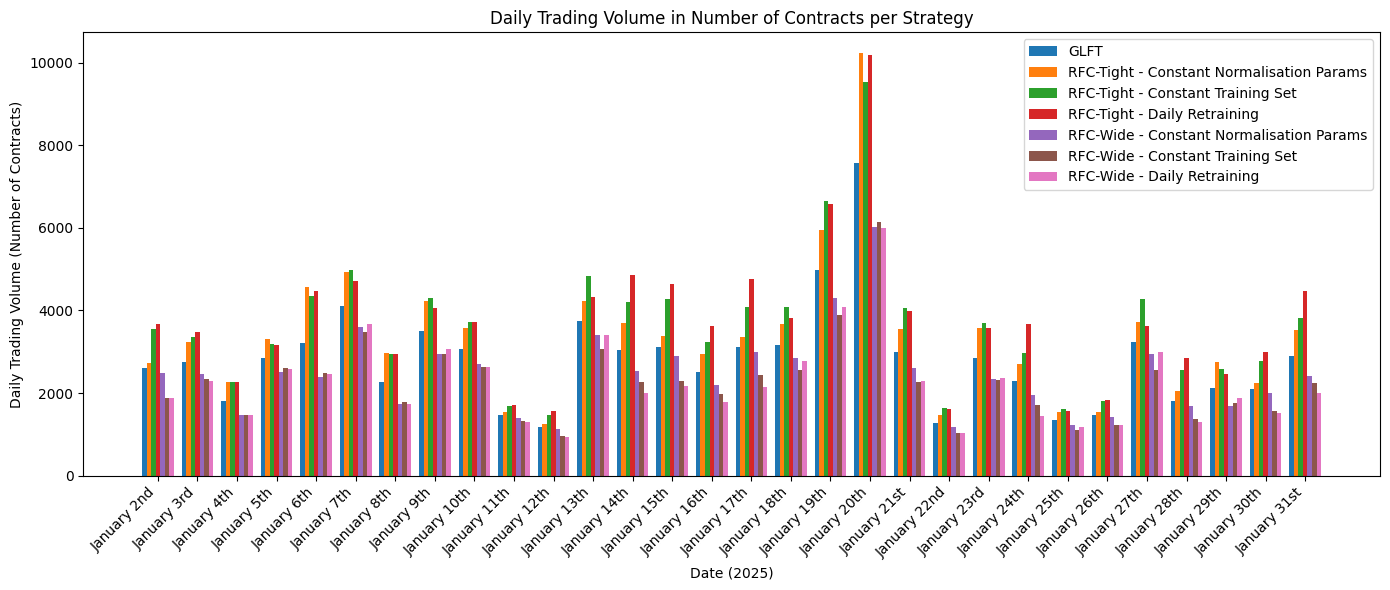

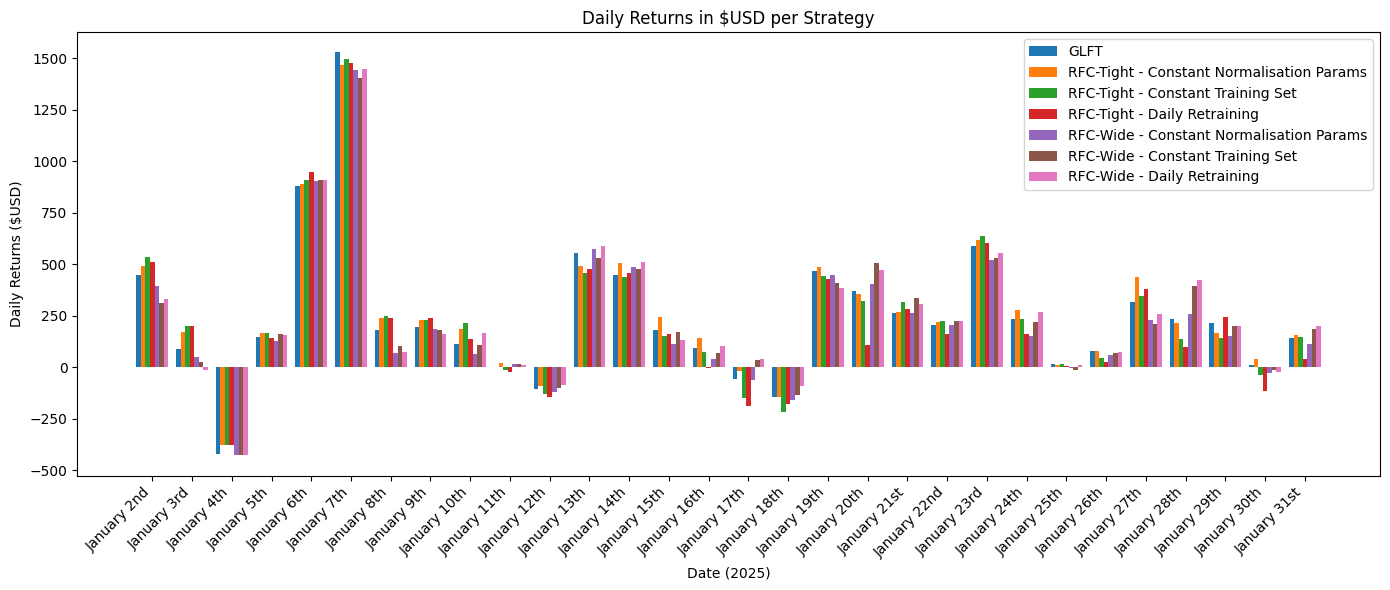

In [13]:
def ordinal(n):
    return f"{n}{'th' if 10<=n%100<=20 else {1:'st',2:'nd',3:'rd'}.get(n%10,'th')}"

frames = [
    glft_daily.assign(strategy='GLFT'),
    rf_dynamic_tight.assign(strategy='RFC-Tight - Daily Retraining'),
    rf_dynamic_wide.assign(strategy='RFC-Wide - Daily Retraining'),
    rf_tight_constant_norm.assign(strategy='RFC-Tight - Constant Normalisation Params'),
    rf_wide_constant_norm.assign(strategy='RFC-Wide - Constant Normalisation Params'),
    rf_tight_constant_train.assign(strategy='RFC-Tight - Constant Training Set'),
    rf_wide_constant_train.assign(strategy='RFC-Wide - Constant Training Set')
]

stacked = (
    pd.concat(frames)
      .pivot(index='date', columns='strategy', values='Return')
      .sort_index()
)

x = np.arange(len(stacked.index))
n = stacked.shape[1]
bar_w = 0.8 / n

offsets = (np.arange(n) - (n-1)/2) * bar_w

fig, ax = plt.subplots(figsize=(14, 6))

for dx, strat in zip(offsets, stacked.columns):
    ax.bar(x + dx, stacked[strat], width=bar_w,
           label=strat)

def ordinal(n):
    return f"{n}{'th' if 10<=n%100<=20 else {1:'st',2:'nd',3:'rd'}.get(n%10,'th')}"

labels = [f"{d.strftime('%B')} {ordinal(d.day)}" for d in stacked.index]
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_xlabel('Date (2025)')
ax.set_ylabel('Daily Returns ($USD)')
ax.set_title('Daily Returns in $USD per Strategy')
ax.legend()
fig.tight_layout()

plt.savefig("../../plots/returns_per_strategy.png", bbox_inches='tight', dpi=600)
plt.show()